In [29]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('traffic.csv')

In [32]:
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB


In [34]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   event    226278 non-null  object        
 1   date     226278 non-null  datetime64[ns]
 2   country  226267 non-null  object        
 3   city     226267 non-null  object        
 4   artist   226241 non-null  object        
 5   album    226273 non-null  object        
 6   track    226273 non-null  object        
 7   isrc     219157 non-null  object        
 8   linkid   226278 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 15.5+ MB


In [35]:
df.shape

(226278, 9)

In [36]:
df.isnull().sum()

event         0
date          0
country      11
city         11
artist       37
album         5
track         5
isrc       7121
linkid        0
dtype: int64

In [37]:
df = df.dropna(subset=['country', 'city', 'isrc'])
df.isnull().sum()

event      0
date       0
country    0
city       0
artist     0
album      0
track      0
isrc       0
linkid     0
dtype: int64

In [38]:
df.shape

(219149, 9)

In [39]:
df['event'].value_counts()

event
pageview    137115
click        53504
preview      28530
Name: count, dtype: int64

In [40]:
# Total number of 'pageviews' events
total_pageviews = df[df['event'] == 'pageview'].shape[0]
print(f'Total Pageview Events: {total_pageviews}')

Total Pageview Events: 137115


In [41]:
# average number of pageview events per day
daily_pageviews = df[df['event'] == 'pageview'].groupby('date').size()
average_daily_pageviews = daily_pageviews.mean()
print(f'Average Daily Pageview Events: {average_daily_pageviews:.2f}')

Average Daily Pageview Events: 19587.86


In [42]:
# Analysis of Other Events
event_counts = df['event'].value_counts()
print('event counts:')
print(event_counts)

event counts:
event
pageview    137115
click        53504
preview      28530
Name: count, dtype: int64


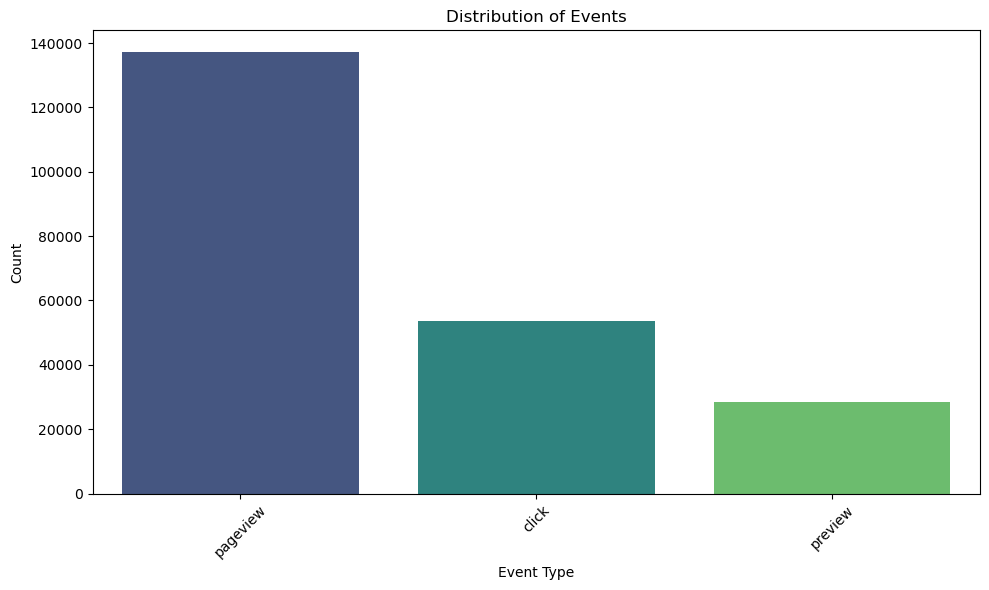

In [43]:
# visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=event_counts.index, y=event_counts.values, palette='viridis')
plt.title('Distribution of Events')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
# Geographical Distribution
country_distribution = df[df['event'] == 'pageview']['country'].value_counts()
print(country_distribution)

country
Saudi Arabia                28597
India                       27285
United States               17311
France                       9658
Iraq                         4830
                            ...  
Guinea-Bissau                   1
Central African Republic        1
Guernsey                        1
Sint Maarten                    1
Saint Martin                    1
Name: count, Length: 211, dtype: int64


In [ ]:
#visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=country_distribution.index, y=country_distribution.values, palette='plasma')
plt.title('Geographical Distribution of Pageviews')
plt.xlabel('Country')
plt.ylabel('Number of Pageviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Click-Through Rate (CTR) Analysis
total_clicks = df[df['event'] == 'click'].shape[0]
ctr = total_clicks / total_pageviews if total_pageviews > 0 else 0
print(f'Overall Click-Through Rate (CTR): {ctr:.2f}')

In [ ]:
# How does the CTR vary across different links
ctr_by_link = df[df['event'] == 'click'].groupby('linkid').size() / df[df['event'] == 'pageview'].groupby('linkid').size()
print(ctr_by_link)

In [ ]:
# Correlation Analysis
clicks_per_link = df[df['event'] == 'click'].groupby('linkid').size()
pageviews_per_link = df[df['event'] == 'pageview'].groupby('linkid').size()

# Create a DataFrame to analyze the correlation
correlation_data = pd.DataFrame({'clicks': clicks_per_link, 'pageviews': pageviews_per_link}).fillna(0)

# Calculate correlation
correlation = correlation_data['clicks'].corr(correlation_data['pageviews'])
print(f'Correlation between Clicks and Pageviews: {correlation}')

# Perform a Pearson correlation test
from scipy.stats import pearsonr

pearson_corr, p_value = pearsonr(correlation_data['clicks'], correlation_data['pageviews'])
print(f'Pearson Correlation: {pearson_corr}, p-value: {p_value}')

very strong positive correlation indicating a nearly perfect positive linear relationship between the number of clicks and pageviews. This suggests that as the number of clicks increases, the number of pageviews tends to increase as well.

A p-value of 0 indicates that the correlation is statistically significant. This means that the likelihood of observing such a strong correlation by chance is extremely low.
This relationship can be leveraged to improve click-through rates (CT)


In [ ]:
# Linear relationships using regression analysis
import statsmodels.api as sm
X = sm.add_constant(correlation_data['pageviews'])
model = sm.OLS(correlation_data['clicks'], X).fit()
print(model.summary())

R-squared (0.988): indicates that approximately 98.8% of the variance in clicks can be explained by pageviews. This is an excellent fit for the model.
pageviews coefficient (0.3792): For every additional pageview, the model predicts an increase of about 0.379 clicks. This suggests a positive relationship between pageviews and clicks.

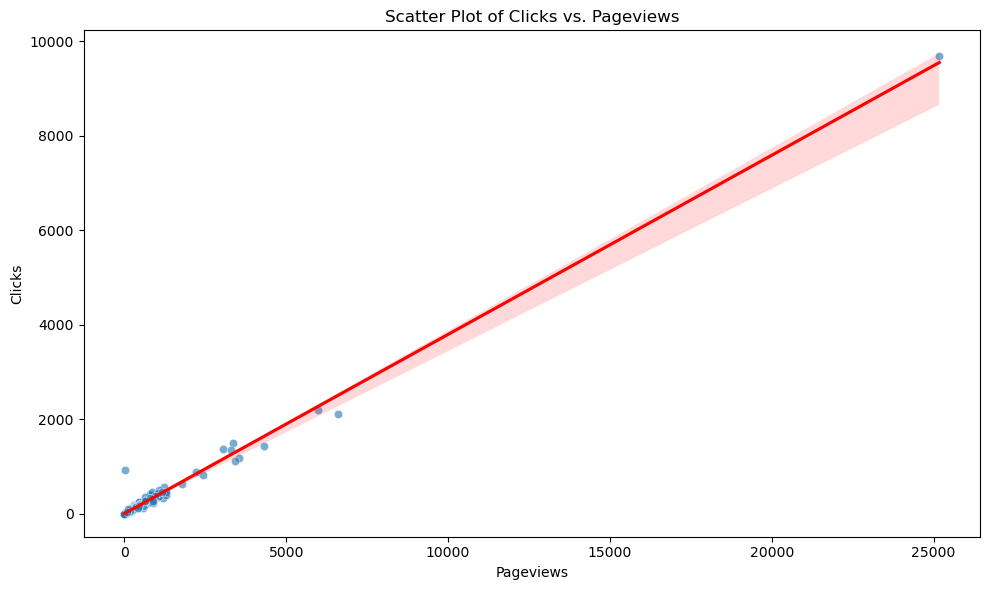

In [28]:
#Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pageviews', y='clicks', data=correlation_data, alpha=0.6)
sns.regplot(x='pageviews', y='clicks', data=correlation_data, scatter=False, color='red')
plt.title('Scatter Plot of Clicks vs. Pageviews')
plt.xlabel('Pageviews')
plt.ylabel('Clicks')
plt.tight_layout()
plt.show()

In [21]:
# Categorical relationships using Chi-square tests
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['event'], df['linkid'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f'Chi-Square Statistic: {chi2}, p-value: {p}')

Chi-Square Statistic: 6390.683279716768, p-value: 0.0


Chi-Square Statistic (6390.68) indicates the extent of deviation between the observed and expected frequencies in the contingency table, this very high Chi-Square value suggests a significant difference in the distribution of events across categories.